# Generate speech from long text

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [malaya-speech/example/tts-long-text](https://github.com/huseinzol05/malaya-speech/tree/master/example/tts-long-text).
    
</div>

<div class="alert alert-warning">

This module is not language independent, so it not save to use on different languages. Pretrained models trained on hyperlocal languages.
    
</div>

<div class="alert alert-warning">

This is an application of malaya-speech Pipeline, read more about malaya-speech Pipeline at [malaya-speech/example/pipeline](https://github.com/huseinzol05/malaya-speech/tree/master/example/pipeline).
    
</div>

In [1]:
import malaya_speech
import numpy as np
from malaya_speech import Pipeline
import matplotlib.pyplot as plt
import IPython.display as ipd

### TTS model

We are going to use FastSpeech2, really fast and accurate.

### List available FastSpeech2

In [2]:
malaya_speech.tts.available_fastspeech2()

Size (MB) Quantized Size (MB) Understand punctuation  \
male                  125                31.7                   True   
female                125                31.7                   True   
husein                125                31.7                   True   
haqkiem               125                31.7                   True   
female-singlish       125                31.7                   True   
osman                 125                31.7                   True   
yasmin                125                31.7                   True   
yasmin-sdp            128                33.1                   True   
osman-sdp             128                33.1                   True   

                Is lowercase  
male                    True  
female                  True  
husein                  True  
haqkiem                 True  
female-singlish         True  
osman                  False  
yasmin                 False  
yasmin-sdp             False  
osman-sdp              False

`husein` voice contributed by [Husein-Zolkepli](https://www.linkedin.com/in/husein-zolkepli/), recorded using low-end microphone in a small room with no reverberation absorber.

`haqkiem` voice contributed by [Haqkiem Hamdan](https://www.linkedin.com/in/haqkiem-daim/), recorded using high-end microphone in an audio studio.

`female-singlish` voice contributed by [SG National Speech Corpus](https://www.imda.gov.sg/programme-listing/digital-services-lab/national-speech-corpus), recorded using high-end microphone in an audio studio.

### Load FastSpeech2 model

Fastspeech2 use text normalizer from Malaya, https://malaya.readthedocs.io/en/latest/load-normalizer.html#Load-normalizer,

Make sure you install Malaya version > 4.0 to make it works, **to get better speech synthesis, make sure Malaya version > 4.9.1**,

```bash
pip install malaya -U
```

Read more about FastSpeech2 Text-to-Speech at https://malaya-speech.readthedocs.io/en/latest/tts-fastspeech2-model.html

In [12]:
yasmin = malaya_speech.tts.fastspeech2(model = 'yasmin')
osman = malaya_speech.tts.fastspeech2(model = 'osman')

`yasmin` and `osman` are the best speakers for long text TTS task.

### Load Vocoder model

I will use Universal MelGAN in this example, better results, but slower than individual vocoders.

In [4]:
universal_melgan = malaya_speech.vocoder.melgan(model = 'universal-1024')

### Load sentence tokenizer

We are going to use Malaya sentence tokenizer, can split even for very complex pattern, https://malaya.readthedocs.io/en/latest/load-tokenizer.html#Sentence-tokenizer

Make sure installed Malaya first,

```bash
pip3 install malaya
```

In [5]:
import malaya

In [6]:
long_text = """
SHAH ALAM - Pertubuhan Kebajikan Anak Bersatu Selangor (PKABS) bersetuju pihak kerajaan mewujudkan Suruhanjaya Siasatan Diraja (RCI) untuk menyiasat isu kartel daging.

Pengerusinya, Rahmadin Alimuddin berkata, perkara tersebut perlu disiasat sebaiknya kerana isu logo halal palsu membimbangkan umat Islam di negara ini.

Menurutnya, siasatan juga dapat memastikan pembekal daging beku mengikut piawaian yang ditetapkan oleh kerajaan Malaysia sebelum menjualnya di pasaran.

“Saya berharap pihak yang menyiasat isu daging kartel dapat menyelesaikan isu ini dengan adil supaya rakyat Malaysia tidak ragu dengan daging beku yang berada di pasaran,” katanya ketika dihubungi Sinar Harian pada Sabtu.

Terdahulu, Rahmadin dan Presiden Gagasan Baru Harapan Malaysia (GBHM), Mohd Zulfitri Mohd Basir telah menghantar memorandum kepada Suruhanjaya Pencegahan Rasuah Malaysia (SPRM) bagi meminta pihak tersebut menjalankan siasatan berkenaan kes kartel daging import haram di Senai, Johor awal Disember lalu.

Penyerahan memorandum tersebut meminta pihak berkuasa mendedahkan kartel yang terlibat dalam sindiket itu selain meminta penjelasan daging tersebut boleh terlepas daripada pihak berkuasa.
"""

### Use Pipeline

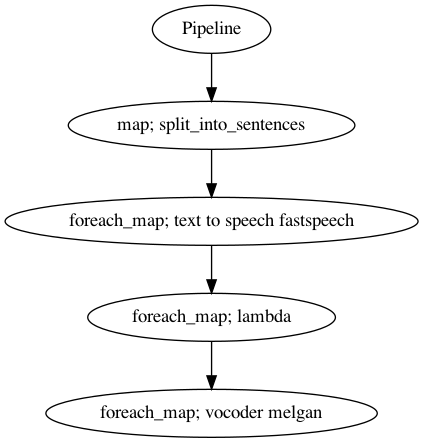

In [30]:
p = Pipeline()
pipeline = (
    p.map(malaya.text.function.split_into_sentences)
    .foreach_map(yasmin)
    .foreach_map(lambda x: x['universal-output'])
    .foreach_map(universal_melgan)
)
p.visualize()

In [31]:
%%time

r = p(long_text)

CPU times: user 2min 23s, sys: 30 s, total: 2min 53s
Wall time: 29.2 s


In [32]:
silent_period = np.array([0] * int(22050 * 0.5))
concated = []
for i in range(len(r['vocoder-melgan'])):
    c = [r['vocoder-melgan'][i]]
    if i < len(r['vocoder-melgan']) - 1:
        c.append(silent_period)
    concated.extend(c)

In [33]:
ipd.Audio(np.concatenate(concated), rate = 22050)

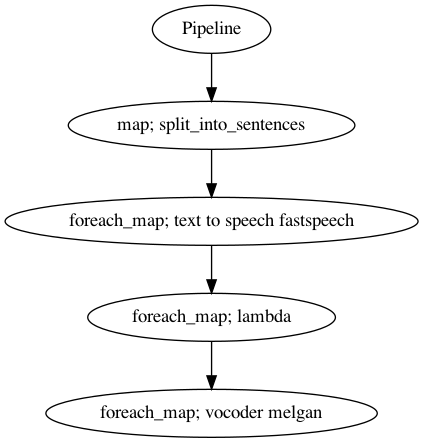

In [23]:
p = Pipeline()
pipeline = (
    p.map(malaya.text.function.split_into_sentences)
    .foreach_map(osman)
    .foreach_map(lambda x: x['universal-output'])
    .foreach_map(universal_melgan)
)
p.visualize()

In [24]:
%%time

r = p(long_text)

CPU times: user 2min 10s, sys: 28.3 s, total: 2min 38s
Wall time: 34.1 s


In [28]:
concated = []
for i in range(len(r['vocoder-melgan'])):
    c = [r['vocoder-melgan'][i]]
    if i < len(r['vocoder-melgan']) - 1:
        c.append(silent_period)
    concated.extend(c)

In [29]:
ipd.Audio(np.concatenate(concated), rate = 22050)